In [1]:
28974

28974

In [5]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

from datetime import datetime
from sgp4.api import Satrec, SatrecArray, WGS72

import concurrent.futures

pd.set_option("display.max_columns", 999)

global dataset
dataset = "train" # variable for lazy loading defaultdict
input_files = [
    "train",
    "test",
    "secret_test",
]

from collections import defaultdict
# using defaultdict to lazy load dataframes.... probably should stay in notebook as shortcut only
data = defaultdict(lambda: pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../3_min/{dataset}.pkl"))
tle_sup_data = defaultdict(lambda: pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../tle_sup/{dataset}.pkl"))
sgp4_data = defaultdict(lambda: pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../3_min/{dataset}_sgp4rv.pkl"))
# satrec_data = defaultdict(lambda: pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../3_min/{dataset}_satrec.pkl"))

In [12]:
dataset = "train"
df = data[dataset][data[dataset].NORAD_CAT_ID.isin([28974,36024,24403])]
df = df.set_index('EPOCH').sort_index()

In [13]:
df

,NORAD_CAT_ID,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION,REV_AT_EPOCH,YEAR,MONTH,DAY,SUNSPOTS_1D,SUNSPOTS_3D,SUNSPOTS_7D,AIR_MONTH_AVG_TEMP,WATER_MONTH_AVG_TEMP
EPOCH,,,,,,,,,,,,,,,,,,,
1996-09-29 11:57:55.505376,24403,0.000168,0.0,0.001362,81.9933,76.6610,0.005224,43.5883,316.9448,14.985846,1623,1996,9,29,0,0.000000,0.000000,0.291,0.200
1996-10-01 10:26:12.113088,24403,0.000161,0.0,0.001304,81.9935,74.6749,0.005228,37.7093,322.7281,14.986435,1652,1996,10,1,0,0.000000,0.000000,0.208,0.198
1996-10-02 10:28:23.356415,24403,0.000158,0.0,0.001276,81.9935,73.6473,0.005228,34.5883,325.8584,14.986728,1667,1996,10,2,0,0.000000,0.000000,0.208,0.198
1996-10-03 21:43:31.512576,24403,0.000139,0.0,0.001118,81.9973,72.1458,0.005264,30.5800,329.6757,14.987021,1689,1996,10,3,0,0.000000,0.000000,0.208,0.198
1996-10-04 21:45:41.230943,24403,0.000136,0.0,0.001094,81.9985,71.1189,0.005237,26.6149,333.7602,14.987274,1704,1996,10,4,0,0.000000,0.000000,0.208,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27 02:49:42.665088,28974,0.000019,0.0,0.000856,81.2074,282.6783,0.003230,281.8908,77.8647,14.215434,76909,2021,1,27,20,21.000000,25.428571,0.883,0.733
2021-01-27 02:49:42.665088,28974,0.000019,0.0,0.000856,81.2074,282.6783,0.003230,281.8908,77.8647,14.215434,77580,2021,1,27,20,21.000000,25.428571,0.883,0.733
2021-01-27 23:05:58.445664,28974,0.000019,0.0,0.000874,81.2076,281.8371,0.003218,279.4671,80.2869,14.215468,76921,2021,1,27,20,21.000000,25.428571,0.883,0.733


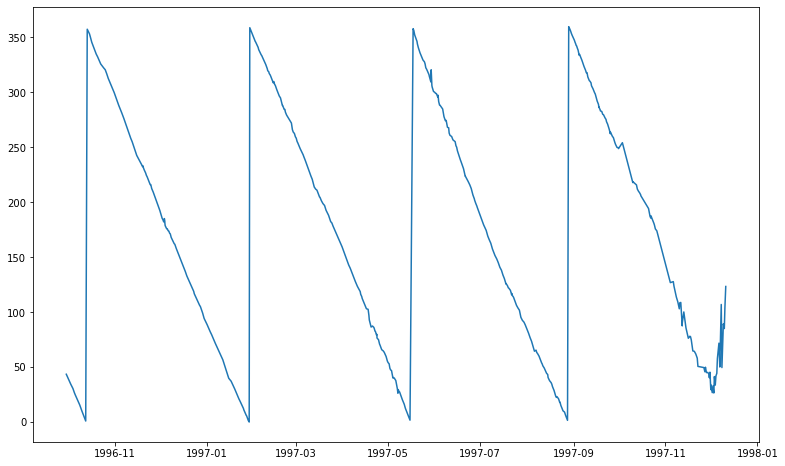

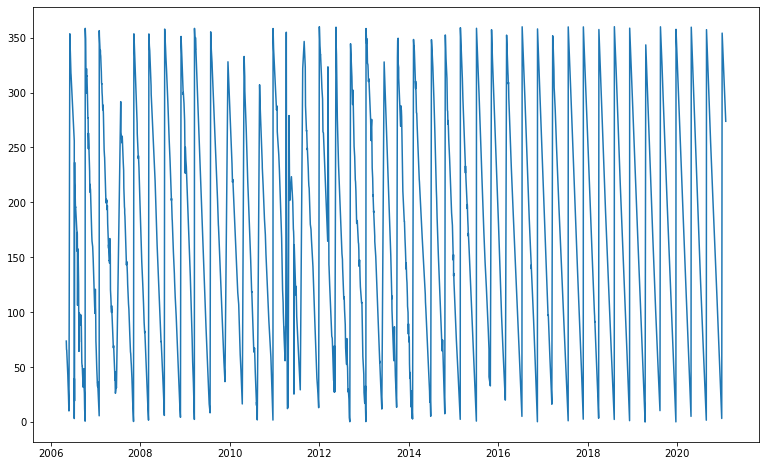

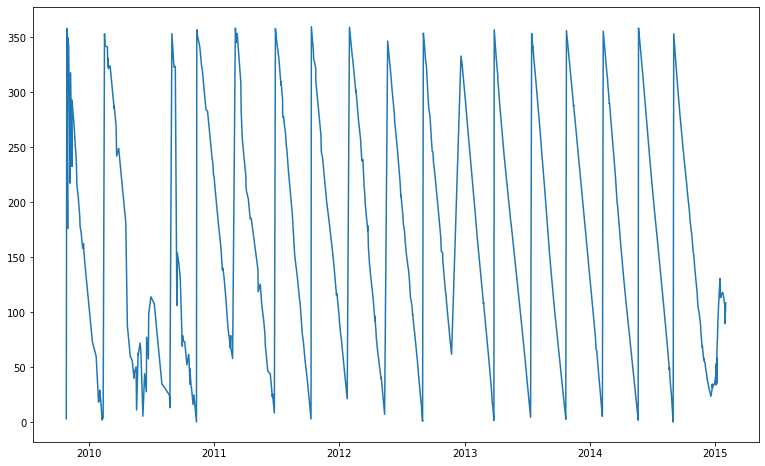

""


In [18]:
def aaa(df):
    fig, ax = plt.subplots(figsize=(13,8))
    plt.plot(df.index, df.ARG_OF_PERICENTER)
    plt.show()
    
df.groupby('NORAD_CAT_ID').apply(aaa)